In [5]:
import os
import gzip

from matplotlib import pyplot as plt

# Download human genome from ensembl

From [Ensembl](https://www.ensembl.org/info/data/ftp/index.html), we can download each chromosome:

In [10]:
url = 'ftp://ftp.ensembl.org/pub/release-96/fasta/homo_sapiens/dna/Homo_sapiens.GRCh38.dna.chromosome.{0}.fa.gz'

In [3]:
chromosome_list = list(range(1, 23)) + ['X', 'Y', 'MT']

In [8]:
for chrom in chromosome_list:
    print('downloading chromsome {}'.format(chrom))
    os.system(('wget -O /scratch/chrom{0}.fa.gz ' + url).format(chrom))

downloading chromsome 1
downloading chromsome 2
downloading chromsome 3
downloading chromsome 4
downloading chromsome 5
downloading chromsome 6
downloading chromsome 7
downloading chromsome 8
downloading chromsome 9
downloading chromsome 10
downloading chromsome 11
downloading chromsome 12
downloading chromsome 13
downloading chromsome 14
downloading chromsome 15
downloading chromsome 16
downloading chromsome 17
downloading chromsome 18
downloading chromsome 19
downloading chromsome 20
downloading chromsome 21
downloading chromsome 22
downloading chromsome X
downloading chromsome Y
downloading chromsome MT


We have a look at on FASTA:

In [21]:
fh = gzip.open('data/chromMT.fa.gz'.format(chrom))
for _ in range(10):
    print(bytes.decode(next(fh).strip()))  # skip the header

>MT dna:chromosome chromosome:GRCh38:MT:1:16569:1 REF
GATCACAGGTCTATCACCCTATTAACCACTCACGGGAGCTCTCCATGCATTTGGTATTTT
CGTCTGGGGGGTATGCACGCGATAGCATTGCGAGACGCTGGAGCCGGAGCACCCTATGTC
GCAGTATCTGTCTTTGATTCCTGCCTCATCCTATTATTTATCGCACCTACGTTCAATATT
ACAGGCGAACATACTTACTAAAGTGTGTTAATTAATTAATGCTTGTAGGACATAATAATA
ACAATTGAATGTCTGCACAGCCACTTTCCACACAGACATCATAACAAAAAATTTCCACCA
AACCCCCCCTCCCCCGCTTCTGGCCACAGCACTTAAACACATCTCTGCCAAACCCCAAAA
ACAAAGAACCCTAACACCAGCCTAACCAGATTTCAAATTTTATCTTTTGGCGGTATGCAC
TTTTAACAGTCACCCCCCAACTAACACATTATTTTCCCCTCCCACTCCCATACTACTAAT
CTCATCAATACAACCCCCGCCCATCCTACCCAGCACACACACACCGCTGCTAACCCCATA


Load some chromosomes into a python dictionary

In [14]:
chromosome_list = ['1', '7', '22', 'MT']

In [15]:
genome = {}
for chrom in chromosome_list:
    genome[chrom] = ''
    fh = gzip.open('data/chrom{0}.fa.gz'.format(chrom))
    _ = next(fh)  # skip the header
    genome[chrom] = ''.join(bytes.decode(line.strip()) for line in fh)

Check chromosome sizes

In [16]:
for chrom in chromosome_list:
    print('{:3} {}'.format(chrom, len(genome[chrom])))

1   248956422
7   159345973
22  50818468
MT  16569


## plot chromosome length

In [17]:
from matplotlib import pyplot as plt
import matplotlib as mpl

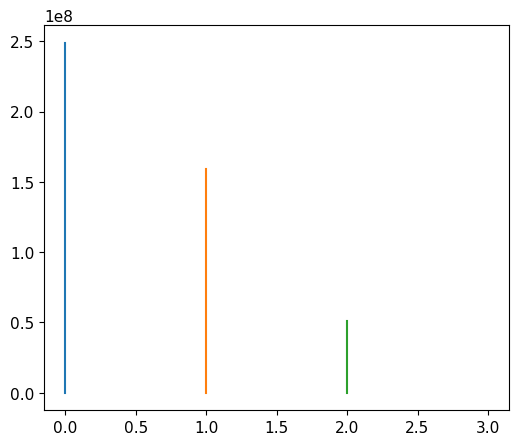

In [18]:
for n, chrom in enumerate(chromosome_list):
    plt.plot([n, n], [0, len(genome[chrom])])

Longest chromosome is 250 Mb

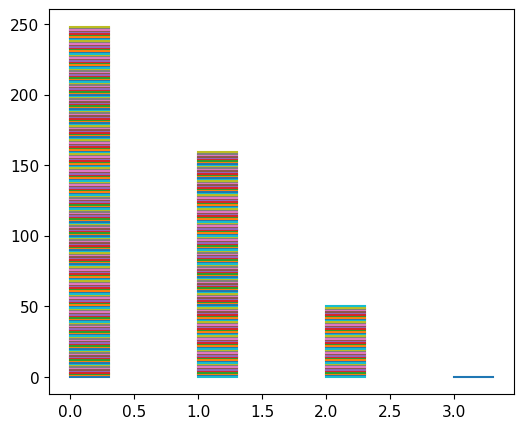

In [22]:
reso = 1000000

for n, chrom in enumerate(chromosome_list):
    for y in range(int(len(genome[chrom]) / reso) + 1):
        plt.plot([n, n + 0.3], [y, y])

Each colored line, represents 1 milion nucleotides... just like A game of thrones first book.

## GC content

Distribution of sizes

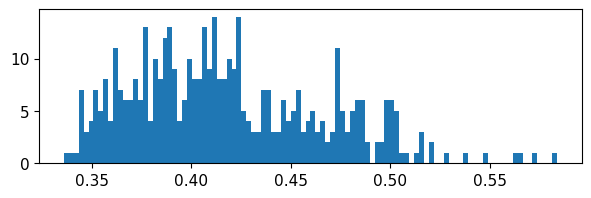

In [23]:
plt.figure(figsize=(7, 2))

gcs = []
for n, chrom in enumerate(chromosome_list):
    for y in range(int(len(genome[chrom]) / reso)):
        sub_seq = genome[chrom][y * reso:(y + 1) * reso]
        gc = sub_seq.count('C') + sub_seq.count('G')
        ns = sub_seq.count('N')
        try:
            gcs.append(gc / (reso - ns))
        except ZeroDivisionError:
            continue

_ = plt.hist(gcs, bins=100)

In [24]:
max_gc, min_gc = max(gcs), min(gcs)
diff_gc = max_gc - min_gc
print(min_gc, max_gc, diff_gc)

0.335929 0.5837117129173197 0.24778271291731974


Plot different GC contents

In [28]:
c

-1.3260771455014015

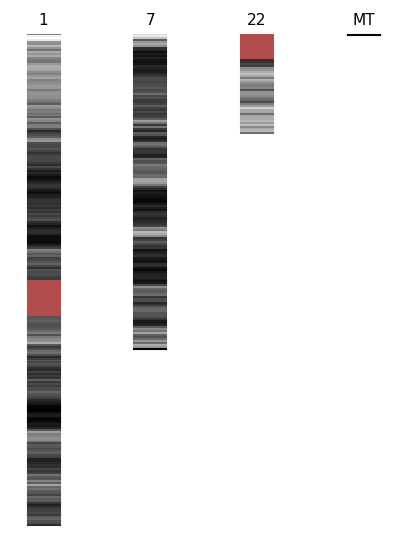

In [29]:
plt.figure(figsize=(5, 7))

# maximum percentage of Ns allowed
max_ns = reso * 0.3

for n, chrom in enumerate(chromosome_list):
    for y in range(int(len(genome[chrom]) / reso) + 1):
        sub_seq = genome[chrom][y * reso:(y + 1) * reso]
        gc = sub_seq.count('C') + sub_seq.count('G')
        ns = sub_seq.count('N')
        if ns > max_ns:
            cs = (0.7, 0.3, 0.3)
        else:
            c = gc / (reso - ns)
            # rescale GC
            c -= min_gc
            c /= diff_gc
            c = max(0, c)
            cs = (c, c, c)        
        plt.plot([n, n + 0.3], [-y, -y], color=cs)
    plt.text(n + 0.15, 5, chrom, ha='center')

_ = plt.axis('off')

Just like typical karyotype image:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/NHGRI_human_male_karyotype.png/765px-NHGRI_human_male_karyotype.png)

# The BRAF gene

The BRAF (BRAF1) genes is located in Chromosome 7: 140,719,327-140,924,928 reverse strand.

In [93]:
braf_beg = 140719327
braf_end = 140924928

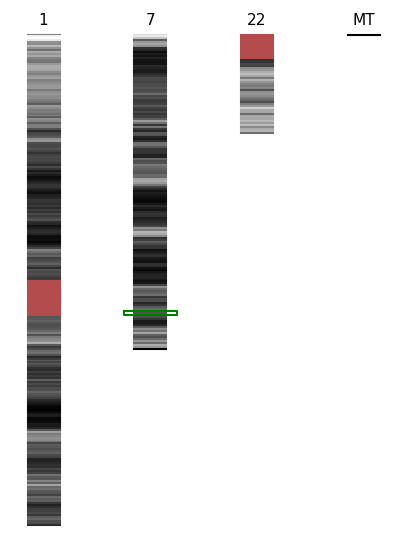

In [102]:
plt.figure(figsize=(5, 7))

# maximum percentage of Ns allowed
max_ns = reso * 0.3

for n, chrom in enumerate(chromosome_list):
    for y in range(int(len(genome[chrom]) / reso) + 1):
        sub_seq = genome[chrom][y * reso:(y + 1) * reso]
        gc = sub_seq.count('C') + sub_seq.count('G')
        ns = sub_seq.count('N')
        if ns > max_ns:
            cs = (0.7, 0.3, 0.3)
        else:
            c = gc / (reso - ns)
            # rescale GC
            c -= min_gc
            c /= diff_gc
            c = max(0, c)
            cs = (c, c, c)        
        plt.plot([n, n + 0.3], [-y, -y], color=cs)
    plt.text(n + 0.15, 5, chrom, ha='center')

plt.plot([0.9, 1.4, 1.4, 0.9, 0.9], [-braf_beg / reso + 1, -braf_beg / reso + 1, 
                                     -braf_end / reso - 1, -braf_end / reso - 1, -braf_beg / reso + 1], 
         ls='-', color='green')
_ = plt.axis('off')

In [85]:
genome['7'][140719327:140924928]

'GAAGACTTCTCCATGCAGTCAATCTTTATTATAGCAGTATTCGCATATTCACATCAAGTACATAGAACTTTTTTTGCCTTTTATATAATACAGTTTTTAAATAACTTTACACAGAAATAAATTTCTTCAATCTGAATTTCAGCTATCTTTTTTTATTCTCCATGCTTTCTATCCAAACTGAACAATATTTTCTGTTATACAAATTTACATGAGAAAAACTCCAAAGTACAAATGAAGGGACCTGAGCAGGAAAGAGAACCAAAGTATCAGGAAGTGGGTATGGGGGAGAATTAAAAAAAATAATAAAAGATTCAAGCAAACATTGAGAATAGGGGAAAAGAGGGAGACATCATCCATTTGACTGAAAATAAATGTCTTTTTTATGAATTGAAAAATAAGCTTTAAAAATAGTTACTCCATTGTAATTTTTGCAAAGCAGGTATAGAGAGGTCTGTGGACAATTAAAAAGTCCCCATCTTTTCACTGGGCACGCCCCAGACTCCACGAGAACCTTTTCAATGCTTGAGTGGAACTGAAGTGTACTAAACCCGAACCTTTGGCAGTAACAGAAAAGAGGAATGTGTGTGTGAGTCGCCATAAGGTTTGGAGTGGTGAAACAGGAACCGTGAATTCACTGCAGTTCAAACAGGAAGCATCTCCCTTTCCTCTCCCTTACAGGAGTCATGTCCTCAAACCAAGGAATACATGAAAAGGGGGGATTTCCTTTTTCTTGGTCTAAACCAAAGAGCAATGACAACTACTGAATAAAATTCAGAGACACATGTTGATGAATGATCAAATTCAATCCCCTGATCAGTTGTATGATCCTATCTTAGGAAAGGCAGCAATTGCCATGTTGAGGAAAGGATCAGATGTACAACCAACAAATGAGATTACCACAAATACATATCACTGTGATACAGTCCTCAAAAATCAGGCGATATCATGAAGGCCAAACTGAGTCTATATATGTGGCATGGCCAAAGGAAACACGGAGGA

In [86]:
genome['7'][140719327:140924928][::-1]

'AAGGGGGTTAGGGGAGTCCGAGCCGACGCGGGCCCCGGCGCCCGGCCATGGACTCCACCGGGTCCGCGGGAGGCGGGCGCCGCGGCGGGCCCGGCGAGGAGGGGCGCGGGGGGCGCGGGGGGCGAGGAGGCGGAGGCGGAGGCGGAGGCGGAGGGGGTCGAGAGGCGGAGGGAAGGGGGAGGGGCGGGCTGTCGCCGGCGAGCCCGGGGCCGAGAGCCAATATTCTACCGCCGCGACTCGCCACCGCCACCACCGCCGCGCCTCGGCCCGGTCCGAGACAAGTTGCCCCTGTACCTCGGGCTCCGGCCGCGGCCGCGGCCGCGGCGCCGGAGAAGCCGACGCCTGGGACGGTAAGGCCTCCTCCACTCACGACCGCGGTGGGACGGCGGGAGGGCTGAGGCCCGAGCCGCCGACCGACCACAAATAAAACCTTTCTCCGCCGCCACCCCCGAACTACGGGAGTCGGTGGAAGAGCCCGGTCGAGGCGCCCGACCCTCCACCCGTAGCGGGGGCACAGGGAGAGGCAGTACGTCGCGGAAGGATGCATTTGTGTGTGTTACCGGGCCCCCCAAAGGGACCGGGGGTGGGGTCTACACCCCTAACCCCGTCGCCACCAACTCGCCCTCCGATAGTTATCCCCCGCTTTGAGTCCCAACCAGGCTCTTCCAGTGCTAACCGACTTCATAGGTCGAGACGTAGAGACACCCCACCCCCGCCGCCGCCGGAGCTGCACCTCCTATATCCAATCAACGACCCCGACTCTGTTGTCGGGCTCAATGACAGCGCACATTAAGAATGTACCAGCACCCCTACTACCCCGAGTAGTAAAGGAGAGAGGAGAGGGCCTGACGGGGGGAAGAGTCAGGCGACGGGAAAAAGTGAAAAGATAAACCCCTAAAGAGAAGTGGACAAAATGGGTCGTTTAATAAAACTAAATCAGAAATGAAAAAGTTAGGATTTAGCGTCAAAGGCTACGGAAAAGACCAGAGACCAGGAGAC

In [34]:
genome['7'][140753275:140753393][::-1]

'TATATAAAGAAGTACTTCTGGAGTGTCATTTTTATCCACTAAAACCAGATCGATGTCACTTTAGAGCTACCTCACCCAGGGTAGTCAAACTTGTCAACAGACCTAGGTAAAACACCTA'

Exon starts not with a full codon, the first 2 nucleotides are from another codon, we can thus remmove them here:

In [44]:
genome['7'][140753275:140753393][-2::-1]

'ATATAAAGAAGTACTTCTGGAGTGTCATTTTTATCCACTAAAACCAGATCGATGTCACTTTAGAGCTACCTCACCCAGGGTAGTCAAACTTGTCAACAGACCTAGGTAAAACACCTA'

In [75]:
seq = genome['7'][140753275:140753393][-3::-1]

In [76]:
transcribe = {
    'A': 'U',
    'T': 'A',
    'C': 'G',
    'G': 'C'}

In [90]:
translate = {
    'AUA':'I', 'AUC':'I', 'AUU':'I', 'AUG':'M', 'ACA':'T', 'ACC':'T', 'ACG':'T', 'ACU':'T',
    'AAC':'N', 'AAU':'N', 'AAA':'K', 'AAG':'K', 'AGC':'S', 'AGU':'S', 'AGA':'R', 'AGG':'R',
    'CUA':'L', 'CUC':'L', 'CUG':'L', 'CUU':'L', 'CCA':'P', 'CCC':'P', 'CCG':'P', 'CCU':'P',
    'CAC':'H', 'CAU':'H', 'CAA':'Q', 'CAG':'Q', 'CGA':'R', 'CGC':'R', 'CGG':'R', 'CGU':'R',
    'GUA':'V', 'GUC':'V', 'GUG':'V', 'GUU':'V', 'GCA':'A', 'GCC':'A', 'GCG':'A', 'GCU':'A',
    'GAC':'D', 'GAU':'D', 'GAA':'E', 'GAG':'E', 'GGA':'G', 'GGC':'G', 'GGG':'G', 'GGU':'G',
    'UCA':'S', 'UCC':'S', 'UCG':'S', 'UCU':'S', 'UUC':'F', 'UUU':'F', 'UUA':'L', 'UUG':'L',
    'UAC':'Y', 'UAU':'Y', 'UAA':'.', 'UAG':'.', 'UGC':'C', 'UGU':'C', 'UGA':'.', 'UGG':'W'}

In [91]:
for i in range(0, 3 * (len(seq) // 3), 3):
    dna_codon = seq[i:i + 3]
    rna_codon = ''.join(transcribe[n] for n in dna_codon)
    aa = translate[rna_codon]
    print(dna_codon, rna_codon, aa)

TAT AUA I
AAA UUU F
GAA CUU L
GTA CAU H
CTT GAA E
CTG GAC D
GAG CUC L
TGT ACA T
CAT GUA V
TTT AAA K
TAT AUA I
CCA GGU G
CTA GAU D
AAA UUU F
CCA GGU G
GAT CUA L
CGA GCU A
TGT ACA T
CAC GUG V
TTT AAA K
AGA UCU S
GCT CGA R
ACC UGG W
TCA AGU S
CCC GGG G
AGG UCC S
GTA CAU H
GTC CAG Q
AAA UUU F
CTT GAA E
GTC CAG Q
AAC UUG L
AGA UCU S
CCT GGA G
AGG UCC S
TAA AUU I
AAC UUG L
ACC UGG W
